In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve, auc,f1_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# data analysis

## columns 
eid
vdate
rcount
gender
dialysisrenalendstage
asthma
irondef
pneum
substancedependence
psychologicaldisordermajor
depress
psychother
fibrosisandother
malnutrition
hemo
hematocrit
neutrophils
sodium
glucose
bloodureanitro
creatinine
bmi
pulse
respiration
secondarydiagnosisnonicd9
discharged
facid

Target = lengthofstay

In [132]:
data = pd.read_csv("/Users/anthonycoplo/Desktop/LengthOfStay - Copy _2_.csv")

In [133]:
data

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


In [134]:
data.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')

In [135]:
data.dtypes

eid                             int64
vdate                          object
rcount                         object
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
discharged                     object
facid       

<AxesSubplot:ylabel='None'>

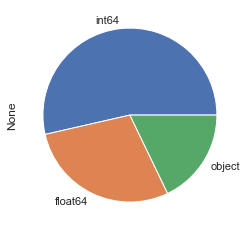

In [136]:
data.dtypes.value_counts().plot.pie()

### NaN

In [137]:
(data.isna().sum()/data.shape[0]).sort_values(ascending = True)

eid                           0.0
discharged                    0.0
secondarydiagnosisnonicd9     0.0
respiration                   0.0
pulse                         0.0
bmi                           0.0
creatinine                    0.0
bloodureanitro                0.0
glucose                       0.0
sodium                        0.0
neutrophils                   0.0
hematocrit                    0.0
hemo                          0.0
malnutrition                  0.0
fibrosisandother              0.0
psychother                    0.0
depress                       0.0
psychologicaldisordermajor    0.0
substancedependence           0.0
pneum                         0.0
irondef                       0.0
asthma                        0.0
dialysisrenalendstage         0.0
gender                        0.0
rcount                        0.0
vdate                         0.0
facid                         0.0
lengthofstay                  0.0
dtype: float64

### Target analysis 

In [96]:
data['lengthofstay'].value_counts()

1     17979
3     16068
4     14822
2     12825
5     12116
6     10362
7      7263
8      4652
9      2184
10     1000
11      460
12      137
13       75
14       31
15       16
16        6
17        4
Name: lengthofstay, dtype: int64

<AxesSubplot:xlabel='lengthofstay', ylabel='count'>

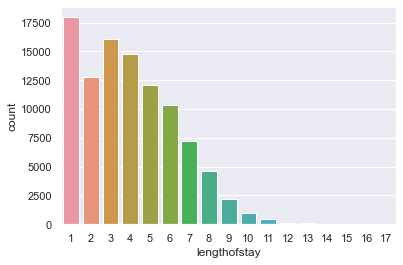

In [98]:
sns.countplot(x=data["lengthofstay"])

### distribution plot

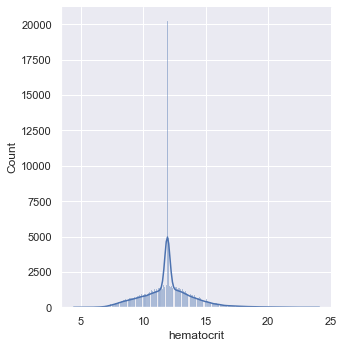

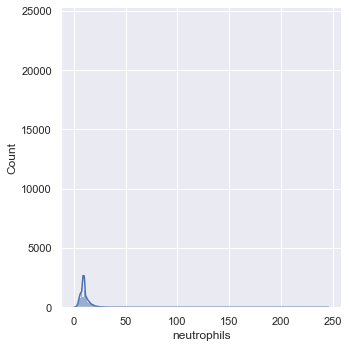

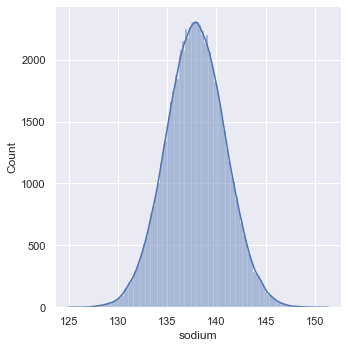

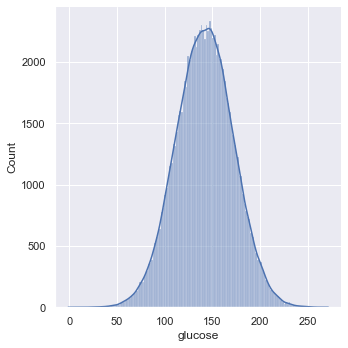

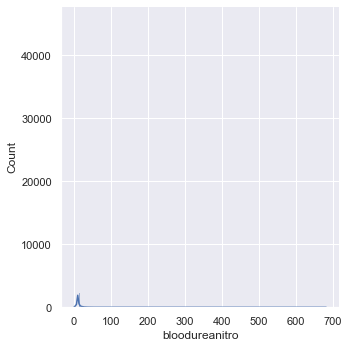

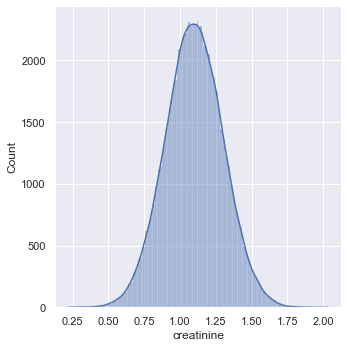

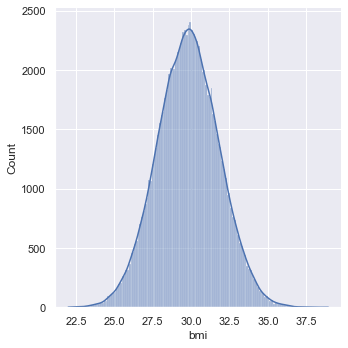

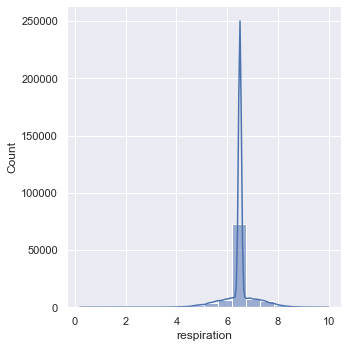

In [16]:
for col in data.select_dtypes('float64'):
    sns.set()
    sns.displot(data[col], kde =True)

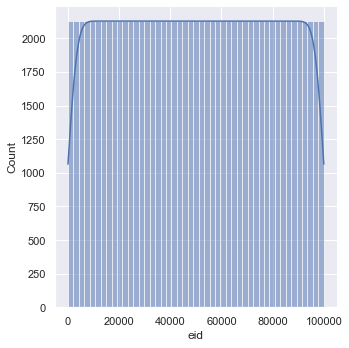

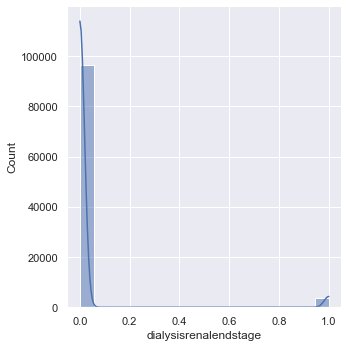

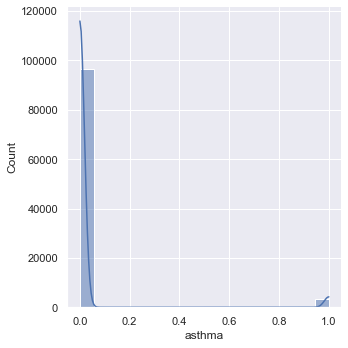

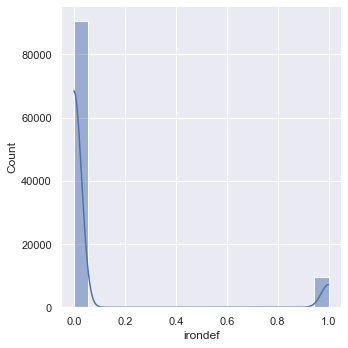

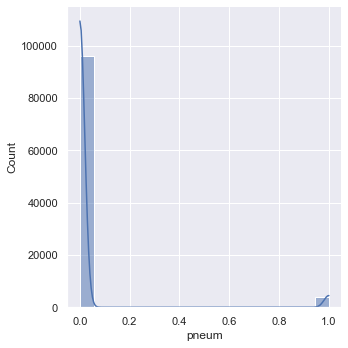

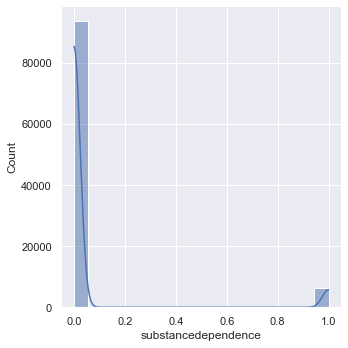

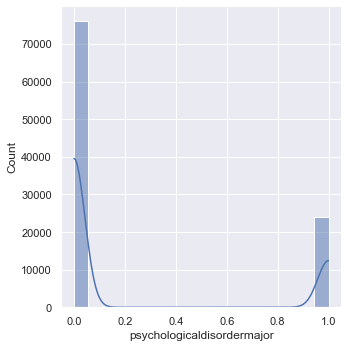

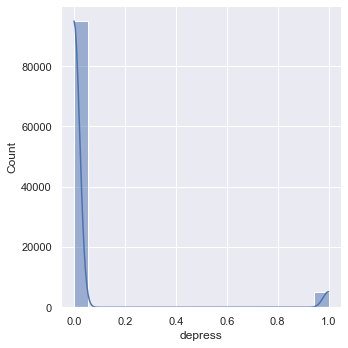

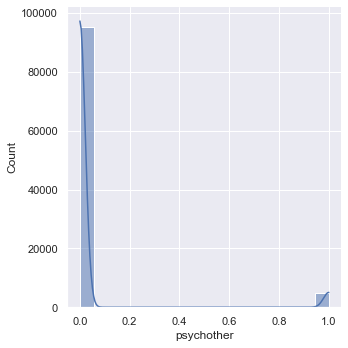

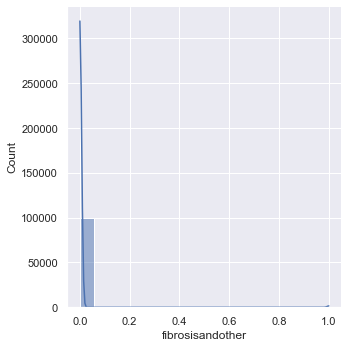

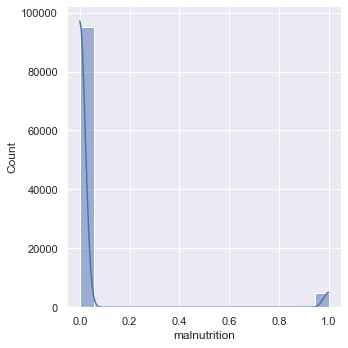

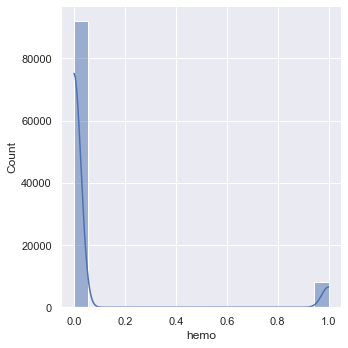

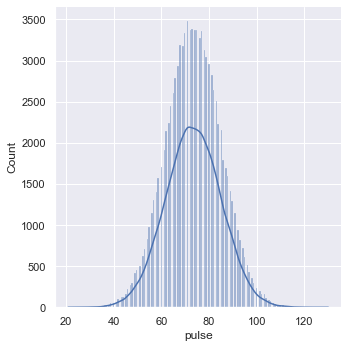

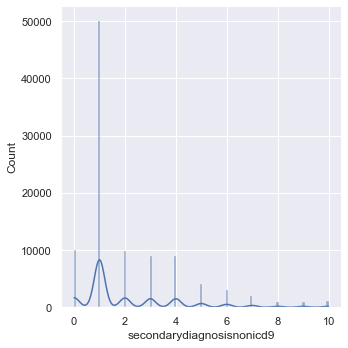

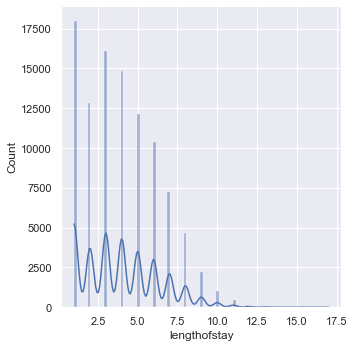

In [38]:
for col in data.select_dtypes('int64'):
    sns.set()
    sns.displot(data[col], kde =True)

### Sex / target analysis

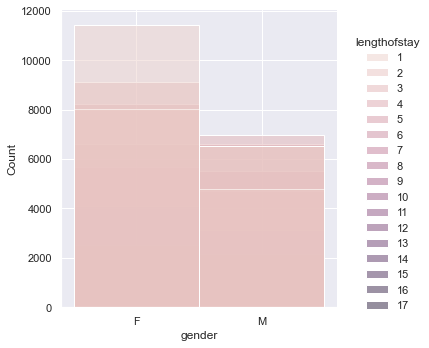

In [32]:
sns.displot(data, x = 'gender', hue = 'lengthofstay')

## Pre process

In [ ]:
df1 = data

In [220]:
#transform date in datetime object
df1['vdate'] = pd.to_datetime(df1['vdate'])

#create new feature
df1['daysofweek_admit']=df1['vdate'].dt.day_name()

In [222]:
#transform target to numerical values
df1['lengthofstay']=df1['lengthofstay'].astype('int')

In [231]:
## encode categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df1['rcount'] = encoder.fit_transform(df1['rcount'])

df1['gender'] = encoder.fit_transform(df1['gender'])

df1['daysofweek_admit'] = encoder.fit_transform(df1['daysofweek_admit'])

df1['facid'] = encoder.fit_transform(df1['facid'])
print(df1.dtypes)



eid                                    int64
vdate                         datetime64[ns]
rcount                                 int64
gender                                 int64
dialysisrenalendstage                  int64
asthma                                 int64
irondef                                int64
pneum                                  int64
substancedependence                    int64
psychologicaldisordermajor             int64
depress                                int64
psychother                             int64
fibrosisandother                       int64
malnutrition                           int64
hemo                                   int64
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

## split data

In [232]:
df2 = df1[['rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9',  'facid', 'daysofweek_admit','lengthofstay']]

In [234]:
label = df1[['rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9',  'facid', 'daysofweek_admit']]

In [235]:
target = df2["lengthofstay"]

In [236]:
X_train, X_test, y_train, y_test = train_test_split(label, target, test_size=0.3) # 70% training and 30% test

### try with RF regressor

In [242]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name), mse)

Mean Squared Error for DecisionTreeClassifier is 0.43823456666666666


In [243]:
score = model.score(X_test,y_test)
score

0.9212863536009939

In [244]:
y_pred

array([1.  , 2.46, 3.17, ..., 4.61, 8.79, 8.3 ])

### Try to optimise model by gridsearch

In [247]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [248]:
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [249]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 69.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [500, 700, 1000]},
             verbose=1)

In [252]:
print(clf.best_estimator_)

RandomForestRegressor(min_samples_split=3, n_estimators=1000)


In [254]:
model = RandomForestRegressor(min_samples_split=3, n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for {} is'.format(name), mse)

Mean Squared Error for DecisionTreeClassifier is 0.42988821116444254


In [255]:
score = model.score(X_test,y_test)
score

0.9227854870005328

### Feature importance

Feature: 0, Score: 0.56629
Feature: 1, Score: 0.00072
Feature: 2, Score: 0.00361
Feature: 3, Score: 0.00132
Feature: 4, Score: 0.00185
Feature: 5, Score: 0.00143
Feature: 6, Score: 0.00169
Feature: 7, Score: 0.00593
Feature: 8, Score: 0.00201
Feature: 9, Score: 0.00099
Feature: 10, Score: 0.00035
Feature: 11, Score: 0.00110
Feature: 12, Score: 0.02117
Feature: 13, Score: 0.04588
Feature: 14, Score: 0.01509
Feature: 15, Score: 0.02562
Feature: 16, Score: 0.02570
Feature: 17, Score: 0.01780
Feature: 18, Score: 0.02552
Feature: 19, Score: 0.02615
Feature: 20, Score: 0.02324
Feature: 21, Score: 0.02802
Feature: 22, Score: 0.00251
Feature: 23, Score: 0.15311
Feature: 24, Score: 0.00290


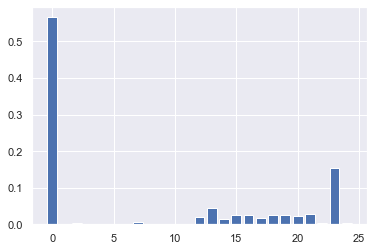

In [264]:
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### export model

In [274]:
import pickle
import bz2

# save the model to disk
pickle.dump(model, open('/Users/anthonycoplo/Desktop/LOS_model.pkl','wb'))


In [268]:
X_train.columns

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'daysofweek_admit'],
      dtype='object')

In [292]:
X_test

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,daysofweek_admit
70589,0,1,0,0,0,0,0,0,0,0,0,0,0,11.9,9.4,135.149424,136.819548,12.0,1.303508,32.424760,77,6.5,1,1,2
38352,1,1,0,0,0,0,0,0,0,0,0,0,0,13.2,19.9,137.914194,186.890034,5.5,0.983861,30.423491,83,6.5,1,1,4
26085,0,1,0,0,0,0,0,0,0,0,0,0,0,11.9,9.4,133.350628,144.542363,12.0,1.343477,28.339398,59,6.5,1,0,0
23356,2,0,0,0,0,0,0,0,0,0,0,0,0,11.3,7.4,139.068149,127.209380,17.0,0.697302,33.659150,84,7.1,4,1,4
93277,4,1,0,0,0,0,0,0,0,0,0,0,0,12.0,9.3,136.239943,162.044287,12.0,1.018530,28.451117,77,6.5,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15089,0,0,0,0,0,0,0,1,1,0,0,0,0,11.3,6.2,135.194680,145.220209,10.0,0.991586,30.821934,63,6.5,1,4,1
3373,0,1,0,0,0,0,0,1,0,1,0,0,0,9.0,8.3,132.345795,102.439809,18.0,0.992075,28.639330,58,4.1,0,4,1
28567,2,1,0,0,0,0,0,0,0,0,0,0,0,16.3,5.4,138.997057,151.511945,9.0,1.199748,32.115403,82,6.5,5,1,1
92638,5,1,0,0,0,0,0,0,0,0,0,1,0,10.6,8.3,141.259103,167.875521,22.0,1.107491,29.306433,70,5.2,3,2,3


In [290]:
pd.set_option('display.max_columns', None)

In [327]:
liste = ['0','1','0','0','0','0','0','0', '0', '0', '0','0','0','11.9','9.4','135.149424','136.819548','12.0','1.303508','32.424760','77','6.5','1','1','2']

In [328]:
listenp = pd.Series(liste)

In [329]:
listenp

0       0
1       1
2       0
3       0
4       0
     ... 
20     77
21    6.5
22      1
23      1
24      2
Length: 25, dtype: object

In [361]:
X_test

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,daysofweek_admit
70589,0,1,0,0,0,0,0,0,0,0,0,0,0,11.9,9.4,135.149424,136.819548,12.0,1.303508,32.424760,77,6.5,1,1,2
38352,1,1,0,0,0,0,0,0,0,0,0,0,0,13.2,19.9,137.914194,186.890034,5.5,0.983861,30.423491,83,6.5,1,1,4
26085,0,1,0,0,0,0,0,0,0,0,0,0,0,11.9,9.4,133.350628,144.542363,12.0,1.343477,28.339398,59,6.5,1,0,0
23356,2,0,0,0,0,0,0,0,0,0,0,0,0,11.3,7.4,139.068149,127.209380,17.0,0.697302,33.659150,84,7.1,4,1,4
93277,4,1,0,0,0,0,0,0,0,0,0,0,0,12.0,9.3,136.239943,162.044287,12.0,1.018530,28.451117,77,6.5,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15089,0,0,0,0,0,0,0,1,1,0,0,0,0,11.3,6.2,135.194680,145.220209,10.0,0.991586,30.821934,63,6.5,1,4,1
3373,0,1,0,0,0,0,0,1,0,1,0,0,0,9.0,8.3,132.345795,102.439809,18.0,0.992075,28.639330,58,4.1,0,4,1
28567,2,1,0,0,0,0,0,0,0,0,0,0,0,16.3,5.4,138.997057,151.511945,9.0,1.199748,32.115403,82,6.5,5,1,1
92638,5,1,0,0,0,0,0,0,0,0,0,1,0,10.6,8.3,141.259103,167.875521,22.0,1.107491,29.306433,70,5.2,3,2,3


In [369]:
y_test

70589    1
38352    3
26085    3
23356    5
93277    6
        ..
15089    3
3373     8
28567    5
92638    8
78308    9
Name: lengthofstay, Length: 30000, dtype: int64

In [319]:
model_imp = pickle.load(open('/Users/anthonycoplo/Desktop/model/LOS_model.pkl', 'rb'))

In [342]:
res = X_test.loc[70589]

In [343]:
res

rcount                        0.0
gender                        1.0
dialysisrenalendstage         0.0
asthma                        0.0
irondef                       0.0
                             ... 
pulse                        77.0
respiration                   6.5
secondarydiagnosisnonicd9     1.0
facid                         1.0
daysofweek_admit              2.0
Name: 70589, Length: 25, dtype: float64

In [358]:
y_pred_v = model_imp.predict([['0','1','0','0','0','0','0','0', '0', '0', '0','0','0','11.9','9.4','135.149424','136.819548','12.0','1.303508','32.424760','77','6.5','1','1','2']])

In [359]:
y_pred_v

array([1.])

In [368]:
str(y_pred_v.item())

'1.0'

In [373]:
X_test["facid"].value_counts()

4    9266
1    9032
0    8860
2    1447
3    1395
Name: facid, dtype: int64

In [374]:
help("modules")


Please wait a moment while I gather a list of all available modules...



/Users/anthonycoplo/opt/anaconda3/lib/python3.7/site-packages/Bio/Align/substitution_matrices/__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)
/Users/anthonycoplo/opt/anaconda3/lib/python3.7/site-packages/Bio/Crystal/__init__.py:44: BiopythonDeprecationWarning: Bio.Crystal has been deprecated, and we intend to remove it in a future release of Biopython. Please use Bio.PDB instead to parse NDB files.
  " to parse NDB files.", BiopythonDeprecationWarning)
/Users/anthonycoplo/opt/anaconda3/lib/python3.7/site-packages/Bio/KDTree/__init__.py:27: BiopythonDeprecationWarning: Bio.KDTree has been deprecated, and we intend to remove it in a future release of Biopython. Please use Bio.PDB.kdtrees instead, which

AnyQt               brain_numpy_core_multiarray joblib              reprlib
Bio                 brain_numpy_core_numeric json                requests
BioSQL              brain_numpy_core_numerictypes json5               requests_oauthlib
IPython             brain_numpy_core_umath jsonschema          resource
OpenSSL             brain_numpy_ndarray jupyter             retrying
Orange              brain_numpy_random_mtrand jupyter_client      rlcompleter
PIL                 brain_numpy_utils   jupyter_contrib_core rmagic
PyQt5               brain_pkg_resources jupyter_contrib_nbextensions ruamel_yaml
__future__          brain_pytest        jupyter_core        runpy
_abc                brain_qt            jupyter_highlight_selected_word s3transfer
_ast                brain_random        jupyter_nbextensions_configurator sacrebleu
_asyncio            brain_re            jupyterlab          sacremoses
_bisect             brain_responses     jupyterlab_pygments sched
_blake2             brai